# Исследование объявлений о продаже квартир

## Задача

Провести исследовательский анализ данным Яндекс.Недвижимости о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, имея в виду, что одна часть данных вписана пользователями, а другая получена автоматически на основе картографических данных.

## Описание данных

Таблица **real_estate_data** (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет) со следующими столбцами:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Оглавление

### [Шаг 1. Открытие файла с данными и изучение общей информации](#read_data)
### [Шаг 2. Предобработка данных](#data_preprocessing)
- [Обработка пропусков](#data_gaps)
- [Замена типа данных](#data_type_replacement)
- [Преобразование названий населённых пунктов](#locality_names_change)

### [Шаг 3. Добавление данных в таблицу](#data_addition)
### [Шаг 4. Исследовательский анализ данных](#exploratory_data_analysis)
- [Изучение площадей, цен, числа комнат и высот потолков квартир](#area_price_rooms_ceiling_analysis)
- [Изучение времени продажи квартир](#days_exposition_analysis)
- [Изучение зависимости цены квартиры от её площади, числа комнат и расстояния до центра](#price_corr_area_rooms_centre)
- [Изучение зависимости цены квартиры от категории этажа](#price_corr_floor)
- [Изучение зависимости цены квартиры от даты размещения объявления](#price_corr_first_exposition)
- [Сравнительный анализ квартир в центре Санкт-Петербурга и в городе в целом](#spb_research)

### [Шаг 5. Общий вывод](#general_conclusion)

## Ход работы

#### Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', 31)

## <a id='read_data'>Шаг 1. Открытие файла с данными и изучение общей информации</a>

#### Откроем файл с данными и сохраним их в переменной *estate_data*.

In [2]:
estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#### Изучим общую информацию.

In [3]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

#### Посчитаем количество пропусков в каждом столбце.

In [4]:
estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
pd.DataFrame(round((estate_data.isna().mean() * 100), 2)).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,38.8
floors_total,0.36
living_area,8.03
floor,0
is_apartment,88.29


#### Посчитаем предварительное число дубликатов в таблице.

In [6]:
estate_data.duplicated().sum()

0

#### Взглянем на первые 10 строк таблицы.

In [7]:
estate_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Найдём максимальное и минимальное значения у столбцов с количественными данными и просмотрим значения в столбце *locality_name* с категориальными данными. Для индикаторных столбцов (булева типа) выполним обе операции.

In [8]:
estate_data.min()

total_images                              0
last_price                            12190
total_area                               12
first_day_exposition    2014-11-27T00:00:00
rooms                                     0
ceiling_height                            1
floors_total                              1
living_area                               2
floor                                     1
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                            1.3
balcony                                   0
airports_nearest                          0
cityCenters_nearest                     181
parks_around3000                          0
parks_nearest                             1
ponds_around3000                          0
ponds_nearest                            13
days_exposition                           1
dtype: object

In [9]:
estate_data.max()

total_images                             50
last_price                         7.63e+08
total_area                              900
first_day_exposition    2019-05-03T00:00:00
rooms                                    19
ceiling_height                          100
floors_total                             60
living_area                           409.7
floor                                    33
is_apartment                           True
studio                                 True
open_plan                              True
kitchen_area                            112
balcony                                   5
airports_nearest                      84869
cityCenters_nearest                   65968
parks_around3000                          3
parks_nearest                          3190
ponds_around3000                          3
ponds_nearest                          1344
days_exposition                        1580
dtype: object

In [10]:
estate_data.query('total_area < living_area or total_area < kitchen_area').shape[0]

0

In [11]:
estate_data.query('total_area < living_area + kitchen_area').shape[0]

64

In [12]:
estate_data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [13]:
estate_data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [14]:
estate_data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [15]:
estate_data['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

In [16]:
estate_data.query('studio or open_plan')['rooms'].value_counts()

0    197
1     14
3      2
5      1
4      1
2      1
Name: rooms, dtype: int64

In [17]:
estate_data.query('rooms == 0').shape[0]

197

In [18]:
len(estate_data['locality_name'].unique())

365

In [19]:
estate_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

### Вывод

Датафрейм состоит из 23 699 строк и 22 столбцов. В большинстве столбцов имеются пропуски, причём в стобцах *parks_around3000* и *ponds_around3000* их количество совпадает — по 5518 пропуска в каждом. Пропуски имеются как в количественных, так и в категориальных данных.

Дубликатов в датафрейме не обнаружено.

Также в глаза бросаются следующие артефакты:
- В некоторых столбцах обнаружено несоответствие типов данных (например, число этажей и балконов представлены числами с плавающей точкой, а дата публикации — в неудобном формате);
- В датафрейме имеются квартиры с 0 комнат, но это либо студии, либо квартиры со свободной планировкой;
- В датафрейме имеются квартиры с потолком высотой 1 м и 100 м;
- В датафрейме имеется квартира площадью 2 м²;
- В датафрейме имеется квартира с кухней площадью 1.3 м²;
- В датафрейме имеется квартира с расстоянием до ближайшего аэропорта в 0 м;
- В датафрейме имеется квартира с расстоянием до ближайшего парка в 1 м;
- В датафрейме имеются 64 квартиры, общая площадь которых меньше суммы жилой площади и площади кухни;
- Некоторые данные в столбце *locality_name* одинаковы по смыслу, однако представлены неэквивалентными строками.

## <a id='data_preprocessing'>Шаг 2. Предобработка данных</a>

### <a id='data_gaps'>Обработка пропусков</a>

#### Посмотрим, есть ли связь между пропусками в стоблцах *parks_around3000* и *ponds_around3000*.

In [20]:
estate_data.query('parks_around3000.isna() and ponds_around3000.isna()').shape[0] ==\
estate_data.query('parks_around3000.isna()').shape[0]

True

Оказалось, что у каждой квартиры с неизвестным число парков в радиусе 3 км также неизвестно число водоёмов в радиусе 3 км.

У некоторых квартир также не указаны значения в столбцах *is_apartment* и *balcony*. Логично предположить, что эти квартиры не являются апартаментами, а балконов у таких квартир нет.

#### Проверим гипотезу о том, что в сторках с пропущенными значениями числа парков и водоёмов в радиусе 3 км соответствующее расстояние до ближайшего парка или водоёма больше 3 км.

In [21]:
estate_data.query('parks_around3000.isna() and parks_nearest <= 3000').shape[0]

0

In [22]:
estate_data.query('ponds_around3000.isna() and ponds_nearest <= 3000').shape[0]

0

#### Заменим пропущенные значения в столбцах *balcony*, *parks_around3000* и *ponds_around3000* на 0, а в столбце *is_apartment* — на False.

In [23]:
estate_data.loc[:, ['balcony', 'parks_around3000', 'ponds_around3000']] =\
estate_data.loc[:, ['balcony', 'parks_around3000', 'ponds_around3000']].fillna(0)

In [24]:
estate_data['is_apartment'] = estate_data['is_apartment'].fillna(False)

#### Найдём условный радиус Санкт-Петербурга.

In [25]:
spb_radius = estate_data.query('locality_name != "Санкт-Петербург" \
                                and locality_name.notna()')['cityCenters_nearest'].min()

#### Убедимся, что все квартиры в этом радиусе находятся в Санкт-Петербурге.

In [26]:
estate_data.query('cityCenters_nearest < @spb_radius')['locality_name'].value_counts()

Санкт-Петербург    14312
Name: locality_name, dtype: int64

In [27]:
estate_data.query('cityCenters_nearest < @spb_radius')['locality_name'].isna().sum()

29

29 из 49 квартир с пропущенным значением в столбце *locality_name*, должно быть, находятся в Санкт-Петербурге.

#### Заменим пропущенные значения в столбце *locality_name* у квартир с радиусом, меньшим *spb_radius*, на значение 'Санкт-Петербург'.

In [28]:
estate_data.loc[estate_data['cityCenters_nearest'] < spb_radius, 'locality_name'] = \
estate_data.loc[estate_data['cityCenters_nearest'] < spb_radius, 'locality_name'].fillna('Санкт-Петербург')

#### Удалим оставшие пропуски в столбцах *floors_total* и *locality_name* ввиду их малочисленности (менее половины процента пропусков в каждом).

In [29]:
estate_data = estate_data.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True)

#### Заменим пропущенные значения в столбце *ceiling_height* медианой ввиду небольшой вариативности данного параметра.

In [30]:
estate_data['ceiling_height'] =\
estate_data['ceiling_height'].fillna(estate_data['ceiling_height'].median())

In [31]:
pd.DataFrame(round((estate_data.isna().mean() * 100), 2)).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,0
floors_total,0
living_area,7.91
floor,0
is_apartment,0


In [32]:
estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

В большей части столбцов датафрейма имелись пропуски. Пропуски в столбцах *parks_around3000* и *ponds_around3000* оказались взаимосвязанными. Оказалось, что в сторках с пропущенными значениями числа парков и водоёмов в радиусе 3 км соответствующее расстояние до ближайшего парка или водоёма больше 3 км. Эти пропуски были заменены на 0.

Скорее всего, пропуски в столбцах *is_apartment* и *balcony* допущены по той простой причине, что квартира не является апартаментами и не имеет балконов. Пропущенные значения в этих столбцах были заменены на False и 0 соответственно.

Пропуски в столбцах *airports_nearest*, *cityCenters_nearest*, *parks_nearest* и *ponds_nearest*, возможно, образовались из-за сбоя в получении картографических данных.

Часть пропусков в столбце *locality_name* была заменена на значение 'Санкт-Петербург', если расстояние до центра города оказалось меньше услового радиуса северной столицы. Оставшиеся малочисленные пропуски в столбцах *locality_name* и *floors_total* были удалены.

Неуказанная высота потолков была заменена медианным значением. Остальные пропуски невозможно корректно обработать.

### <a id='data_type_replacement'>Замена типа данных</a>

Стоимость квартиры измеряется в целочисленных условных единицах. Число этажей, балконов, парков, водоёмов, расстояние до центра города, аэропорта, парка и водоёма, а также количество дней, прошедших от публикации до снятия объявления, также является целым.

#### Приведём данные в соответствующих столбцах к целочисленному типу int64.

In [33]:
estate_data.loc[:, ['last_price', 'floors_total', 'balcony', \
                    'parks_around3000', 'ponds_around3000']] =\
estate_data.loc[:, ['last_price', 'floors_total', 'balcony', \
                    'parks_around3000', 'ponds_around3000']].astype('int')

In [34]:
estate_data.loc[:, ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', \
                    'ponds_nearest',  'days_exposition']] =\
estate_data.loc[:, ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', \
                    'ponds_nearest',  'days_exposition']].round().astype('Int64')

Заметим, что дата публикации объявлений также представлена не в соответствующем формате.

#### Приведём данные о дате публикации объявлений к типу *datetime*.

In [35]:
estate_data['first_day_exposition'] = pd.to_datetime(estate_data['first_day_exposition'], \
                                                     format='%Y-%m-%dT%H:%M:%S')

In [36]:
estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121


### Вывод

Типы данных в столбцах *last_price*, *floors_total*, *balcony*, *parks_around3000*, *ponds_around3000* были заменены на *int64*.
В столбцах с пропусками *airports_nearest*, *cityCenters_nearest*, *parks_nearest*, *ponds_nearest* и *days_exposition* и  данные были приведены к целочисленному типу ввиду *Int64*.

Дата публикации объявлений была приведена к формату *datetime*.

### <a id='locality_names_change'>Преобразование названий населённых пунктов</a>

Как было замечено выше, некоторые данные в столбце *locality_name* представлены неэквивалентными строками, хотя их смысл одинаков. Например, *'деревня Кудрово', 'Кудрово', 'посёлок Пансионат Зелёный Бор', 'поселок Пансионат Зелёный Бор'* и тому подобное. 

#### Уберём из *locality_name* слова, не являющиеся именами собственными, и заменим все буквы 'ё' на буквы 'е'.

In [37]:
def change_locality_name(locality_name):
    return ' '.join(word for word in locality_name.split() if not word.islower()).replace('ё', 'е')

In [38]:
estate_data['locality_name'] = estate_data['locality_name'].apply(change_locality_name)

In [39]:
len(estate_data['locality_name'].unique())

305

In [40]:
estate_data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### Проверим, не появились ли в таблице дубликаты.

In [41]:
estate_data.duplicated().sum()

0

In [42]:
estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121


### Вывод

Все названия населённых пунктов были сокращены непосредственно до имён собственных. Буквы 'ё' в названиях населённых пунктов были заменены на буквы 'e'.

## <a id="data_addition">Шаг 3. Добавление данных в таблицу</a>

Добавим в таблицу ещё несколько полезных для исследования категорий.
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры (первый, последний, другой);
- соотношение жилой и общей площади, а также отношение площади кухни к общей;

Также отнесём каждую из квартир к одному из пяти интервалов в зависимости от расстояния до центра города.

#### Цена квадратного метра.

In [43]:
estate_data['sqm_price'] = \
(estate_data['last_price'] / estate_data['living_area']).round().astype('Int64')

#### День недели, месяц и год публикации объявления.

In [44]:
weekdays = {0: 'понедельник', 1: 'вторник', 2: 'среда', 3: 'четверг', \
            4: 'пятница', 5: 'суббота', 6: 'воскресенье'}
months = {1: 'январь', 2: 'февраль', 3: 'март', 4: 'апрель', 5: 'май', 6: 'июнь', \
          7: 'июль', 8: 'август', 9: 'сентябрь', 10: 'октябрь', 11: 'ноябрь', 12: 'декабрь'}

In [45]:
estate_data['weekday_exposition'] = estate_data['first_day_exposition'].dt.weekday.map(weekdays)
estate_data['month_exposition'] = estate_data['first_day_exposition'].dt.month.map(months)
estate_data['year_exposition'] = estate_data['first_day_exposition'].dt.year

#### Этаж квартиры (первый, последний, другой).

In [46]:
def define_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [47]:
estate_data['first_last_floor'] = estate_data.apply(define_floor, axis=1)

#### Соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [48]:
estate_data['living_area_ratio'] = estate_data['living_area'] / estate_data['total_area']
estate_data['kitchen_area_ratio'] = estate_data['kitchen_area'] / estate_data['total_area']

#### Разделим квартиры на 5 групп в зависимости от расстояния до центра города.

In [49]:
pd.qcut(estate_data['cityCenters_nearest'].astype('float'), 5).value_counts()

(7736.4, 11905.0]     3624
(11905.0, 14445.0]    3622
(17230.6, 65968.0]    3619
(180.999, 7736.4]     3619
(14445.0, 17230.6]    3609
Name: cityCenters_nearest, dtype: int64

In [50]:
estate_data['cityCenters_quintiles'] =\
pd.cut(estate_data['cityCenters_nearest'], [180, 7736, 11905, 14445, 17230, 65968])

In [51]:
estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday_exposition,month_exposition,year_exposition,first_last_floor,living_area_ratio,kitchen_area_ratio,cityCenters_quintiles
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,254902,четверг,март,2019,другой,0.472222,0.231481,"(14445, 17230]"
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817,18603,0,NaN,0,NaN,81,180108,вторник,декабрь,2018,первый,0.460396,0.272277,"(17230, 65968]"
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,151487,четверг,август,2015,другой,0.612500,0.148214,"(11905, 14445]"
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424,NaN,пятница,июль,2015,другой,NaN,NaN,"(180, 7736]"
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,312500,вторник,июнь,2018,другой,0.320000,0.410000,"(7736, 11905]"


### Вывод

В таблицу было добавлено 8 новых столбцов с ценой квадратного метра квартиры, днём недели, месяцем и годом публикации объявления, категорией этажа квартиры (первый, последний или другой), а также долями жилой площади и кухни и интервалами в зависимости от расстояния до центра города.

## <a id="exploratory_data_analysis">Шаг 4. Исследовательский анализ данных</a>

In [52]:
def define_bins(df, column): 
    if df[column].max() > 100:
        return 50
    elif df[column].max() > 500:
        return 100
    elif df[column].max() > 1000:
        return 200
    else:
        return 20

In [53]:
def draw_hist(df, column, single_figure=True, \
              std_upper_bound=True, upper_bound=None, draw_lines=True):
    '''
    Рисует гистограмму соответствующего столбца датафрейма.
    
    Аргументы:
        df (pandas.core.frame.DataFrame): датафрейм.
        
        column (str): название столбца.
        
        single_figure (bool): построить одиночную гистограмму.
        
        std_upper_bound (bool): использовать стандартную правую границу range.
        
        upper_bound (float): нестандартная правая граница range.
        
        draw_lines (bool): нарисовать медиану, 5-ый и 95-ый перцентили.    
    '''
    
    # Если гистограмма должна быть одиночной
    if single_figure:
        # Создаём фигуру
        plt.figure(figsize=(15, 5))
    # Если правая граница range стандартна
    if std_upper_bound:
        # Строим гистограмму
        plt.hist(df[column],                               # по столбцу column датафрейма df
                 range=(0, df[column].quantile(.99)),      # на отрезке от 0 до 99-го перцентиля
                 bins=define_bins(df, column),             # с определённым числом корзин
                 alpha=0.5,                                # прозрачностью 0.5
                 ec='black',                               # с чёрным цветом обводки
                 color='green')                            # с зелёным цветом графика
    # Если же задана правая граница range
    elif upper_bound is not None:
        plt.hist(df[column], 
                 range=(0, upper_bound),                   # учитываем эту границу
                 bins=define_bins(df, column), 
                 alpha=0.5, 
                 ec='black', 
                 color='green')
    # Иначе строим гистограмму, не ограничивая её
    else:
        plt.hist(df[column],
                 bins=define_bins(df, column), 
                 alpha=0.5, 
                 ec='black', 
                 color='green')
    # Если максимальное значение Series больше 1 000 000
    if df[column].max() > 1e+06:
        # Измеряем ось х в миллионах
        plt.ticklabel_format(axis='x', scilimits=(6, 6))
    # Если необходимо нарисовать нарисовать медиану, 5-ый и 95-ый перцентили
    if draw_lines:
        plt.axvline(x=df[column].median(),                 # рисуем медиану
                    linewidth=3,                           # с толщиной линий 3
                    color='red',                           # красного цвета
                    linestyle='--')                        # пунктирным стилем
        plt.axvline(x=df[column].quantile(.05),            # рисуем 5-ый перцентиль
                    linewidth=3, 
                    color='y',                             # тёмно-жёлтого цвета
                    linestyle='--')
        plt.axvline(x=df[column].quantile(.95),            # рисуем 95-ый перцентиль
                    linewidth=3, 
                    color='y', 
                    linestyle='--')
    # Рисуем сетку
    plt.grid()

In [54]:
def draw_boxplot(df, column):
    '''
    Рисует диаграмму размаха соответствующего столбца датафрейма.
    
    Аргументы:
        df (pandas.core.frame.DataFrame): датафрейм.
        
        column (str): название столбца.  
    '''
    
    # Создаём фигуру
    plt.figure(figsize=(15, 5))
    # Строим диаграмму размаха
    plt.boxplot(df[column],                                # по столбцу column датафрейма df
                notch=True,                                # формируем красивый "разрезик" в центре
                sym='o',                                   # задаем символ выброса 'o'
                vert=False,                                # располагаем горизонтально
                widths=0.1,                                # задаем толщину линий
                patch_artist=True)                         # применяем заливку
    # Настроим параметры делений
    plt.tick_params(which='major',                         # применим к основным делениям
                    direction='inout',                     # нарисуем деления внутри и снаружи графика
                    length=20,                             # длиной 20
                    width=4,                               # шириной 4
                    color='m',                             # цвета magenta
                    pad=10,                                # с расстоянием между делением и подписью 10
                    labelsize=15,                          # с размером подписи 15
                    labelcolor='r')                        # с тёмно-красным цветом подписи
    # Ограничим диграмму размаха справа 99-ым перцентилем
    plt.xlim(0, df[column].quantile(.99))
    # Если максимальное значение Series больше 1 000 000
    if df[column].max() > 1e+06:
        # Измеряем ось х в миллионах
        plt.ticklabel_format(axis='x', scilimits=(6, 6))
    plt.axvline(x=df[column].median(),                     # рисуем медиану
                linewidth=3,                               # с толщиной линий 3
                color='red',                               # красного цвета
                linestyle='--')                            # пунктирным стилем
    plt.axvline(x=df[column].quantile(.05),                # рисуем 5-ый перцентиль
                linewidth=3, 
                color='y',                                 # тёмно-жёлтого цвета
                linestyle='--')
    plt.axvline(x=df[column].quantile(.95),                # рисуем 95-ый перцентиль
                linewidth=3, 
                color='y', 
                linestyle='--')
    # Рисуем сетку
    plt.grid(axis='x')

### <a id='area_price_rooms_ceiling_analysis'>Изучим гистограмму площадей квартир.</a>

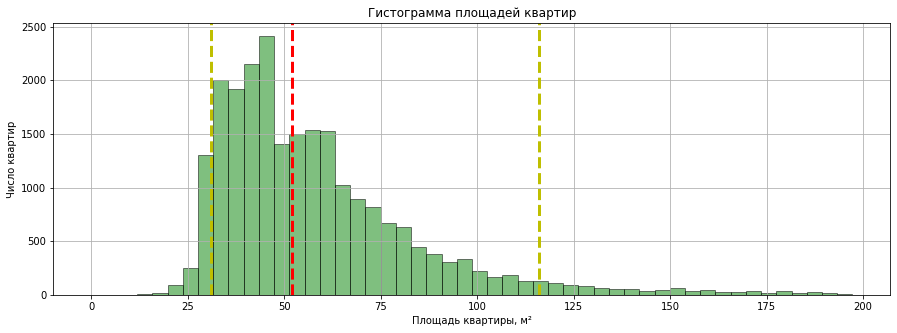

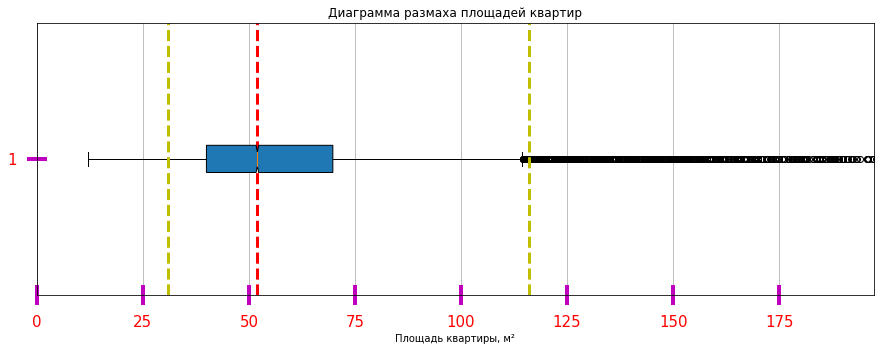

,total_area
count,23594.00
mean,60.34
std,35.65
min,12.00
25%,40.00
50%,52.00
75%,69.79
max,900.00


In [55]:
draw_hist(estate_data, 'total_area')
plt.title('Гистограмма площадей квартир')
plt.xlabel('Площадь квартиры, м²')
plt.ylabel('Число квартир')
draw_boxplot(estate_data, 'total_area')
plt.title('Диаграмма размаха площадей квартир')
plt.xlabel('Площадь квартиры, м²')
plt.show()
pd.DataFrame(estate_data['total_area'].describe().round(2))

### Изучим гистограмму цен квартир.

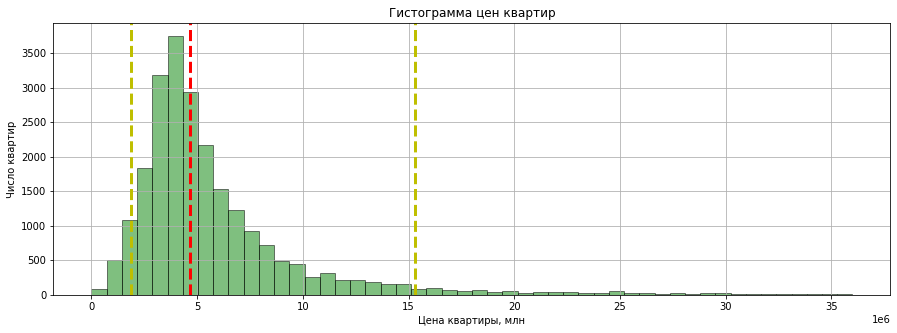

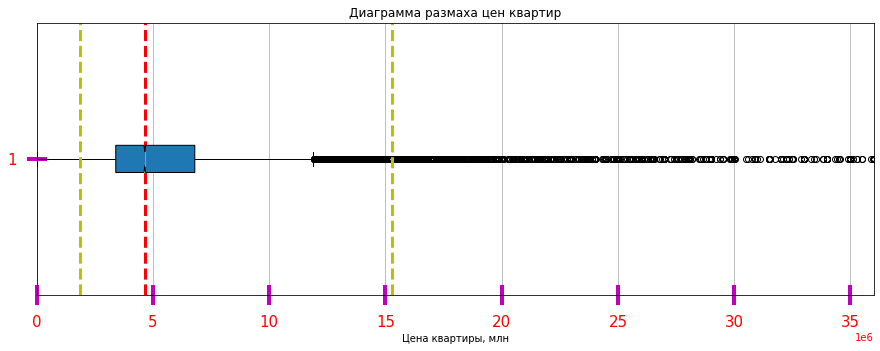

,last_price
count,23594.0
mean,6541905.0
std,10905650.0
min,12190.0
25%,3400000.0
50%,4650000.0
75%,6800000.0
max,763000000.0


In [56]:
draw_hist(estate_data, 'last_price')
plt.title('Гистограмма цен квартир')
plt.xlabel('Цена квартиры, млн')
plt.ylabel('Число квартир')
draw_boxplot(estate_data, 'last_price')
plt.title('Диаграмма размаха цен квартир')
plt.xlabel('Цена квартиры, млн')
plt.show()
pd.DataFrame(estate_data['last_price'].describe().round())

### Изучим гистограмму числа комнат в квартирах.

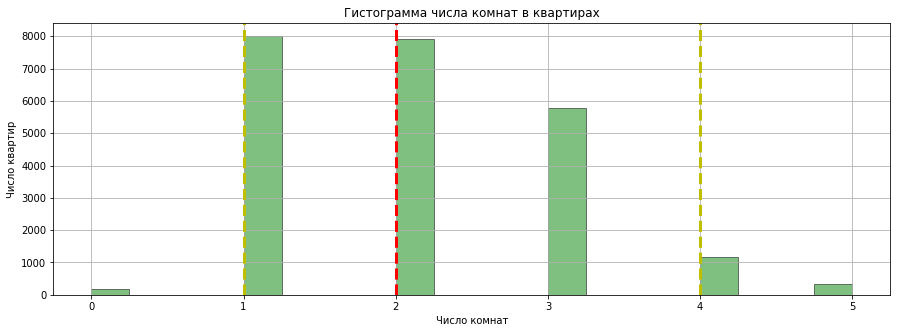

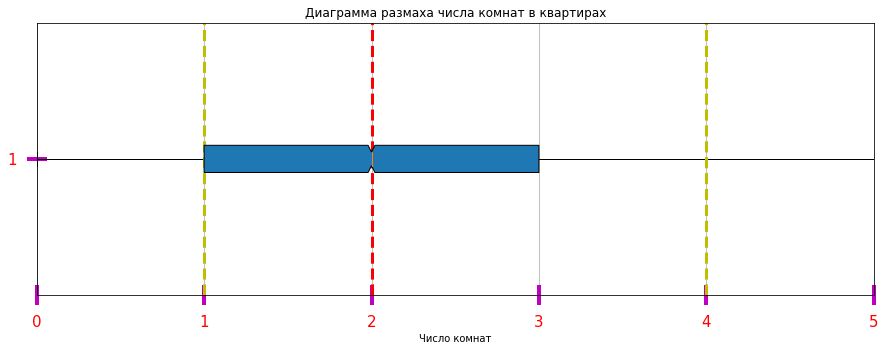

,rooms
count,23594.00
mean,2.07
std,1.08
min,0.00
25%,1.00
50%,2.00
75%,3.00
max,19.00


In [57]:
draw_hist(estate_data, 'rooms')
plt.title('Гистограмма числа комнат в квартирах')
plt.xlabel('Число комнат')
plt.ylabel('Число квартир')
draw_boxplot(estate_data, 'rooms')
plt.title('Диаграмма размаха числа комнат в квартирах')
plt.xlabel('Число комнат')
plt.show()
pd.DataFrame(estate_data['rooms'].describe().round(2))

### Изучим гистограмму высот потолков квартир.

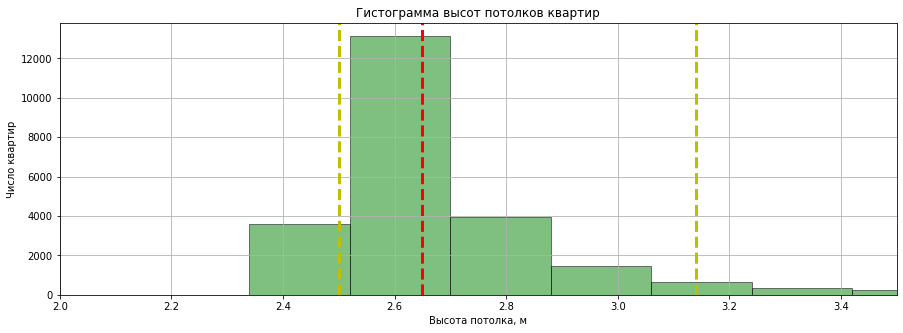

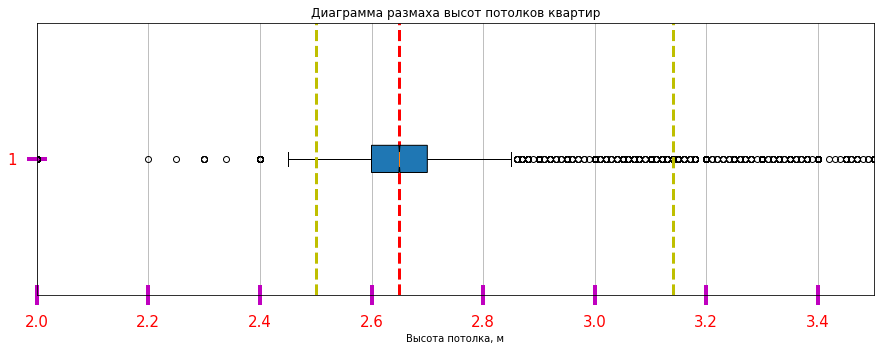

,ceiling_height
count,23594.00
mean,2.72
std,0.99
min,1.00
25%,2.60
50%,2.65
75%,2.70
max,100.00


In [58]:
draw_hist(estate_data, 'ceiling_height')
plt.title('Гистограмма высот потолков квартир')
plt.xlabel('Высота потолка, м')
plt.ylabel('Число квартир')
plt.xlim(2, 3.5)
draw_boxplot(estate_data, 'ceiling_height')
plt.title('Диаграмма размаха высот потолков квартир')
plt.xlabel('Высота потолка, м')
plt.xlim(2, 3.5)
plt.show()
pd.DataFrame(estate_data['ceiling_height'].describe().round(2))

### Вывод

Все рассмотренные параметры имеют редкие аномально высокие значения.

1. На гистограмме площадей квартир наблюдается пик в районе 40-50 м², площадь редко превышает отметку в 150 м² или не достигает 25 м².
2. На гистограмме цен квартир наблюдается пик в районе от 3 до 4.5 млн. Квартиры дороже 15 млн встречаются редко.
3. В основном квартиры имеют 1-2 комнаты, чуть реже — 3. Квартира с более чем 5 комнатами — большая редкость.
4. Высота потолков у большей части квартир варьируется от 2.5 до 3 м.

### <a id='days_exposition_analysis'>Изучим время продажи квартир.</a>

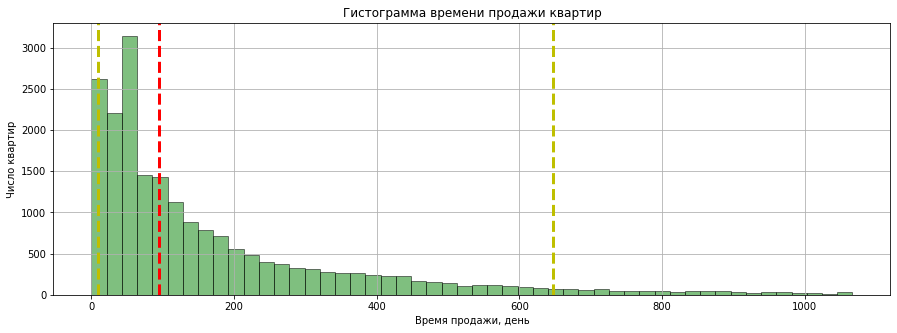

,days_exposition
count,20423.00
mean,180.89
std,219.74
min,1.00
25%,45.00
50%,95.00
75%,232.00
max,1580.00


In [59]:
draw_hist(estate_data, 'days_exposition')
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('Время продажи, день')
plt.ylabel('Число квартир')
plt.show()
pd.DataFrame(estate_data['days_exposition'].describe().round(2))

#### Рассмотрим подозрительные пики до 100 дней.

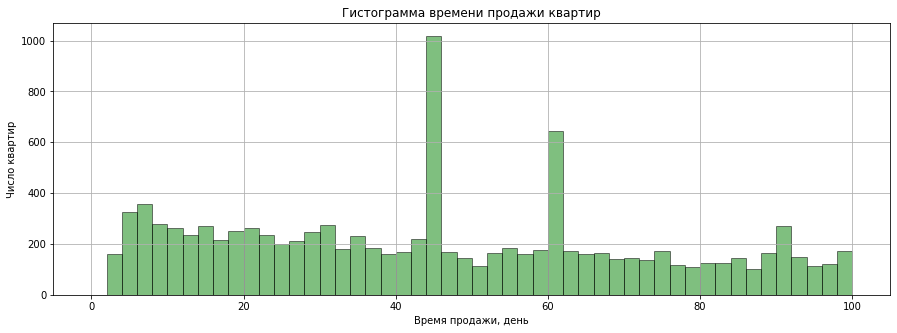

In [60]:
draw_hist(estate_data, 'days_exposition', std_upper_bound=False, upper_bound=100, draw_lines=False)
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('Время продажи, день')
plt.ylabel('Число квартир')
plt.show()

### Вывод

Гистограмма времени продажи квартир напоминает график распределения Пуассона с выбивающимися пиками на 45 и 60 днях. Скорее всего, это связано со стандартными сроками размещения объявлений на платформе. В среднем продажа занимает 180 дней, но медианное значение меньше практически в 2 раза — 95 дней, что говорит о наличии выбросов в данных. Продажи продолжительностью свыше двух лет являются аномально долгими. В свою очередь квартиры, проданные быстрее, чем за рабочую неделю, также настораживают.

#### Посмотрим, какую долю составляют квартиры, у которых в норме находятся сразу все рассматриваемые параметры.

In [61]:
good_data = estate_data.query(
    '15 <= total_area <= 200 and \
    1_000_000 <= last_price <= 15_000_000 and \
    rooms <= 5 and \
    2.5 <= ceiling_height <= 3.5 and \
    5 <= days_exposition <= 365*2')

In [62]:
round(len(good_data) / len(estate_data), 2)

0.77

### Вывод

Квартир с отсутствием аномалий сразу во всех параметрах оказалось 77%. Большинство данных сохранилось. Продолжим исследование, используя очищенные данные.

### <a id='price_corr_area_rooms_centre'>Изучим зависимость цены квартиры от её площади.</a>

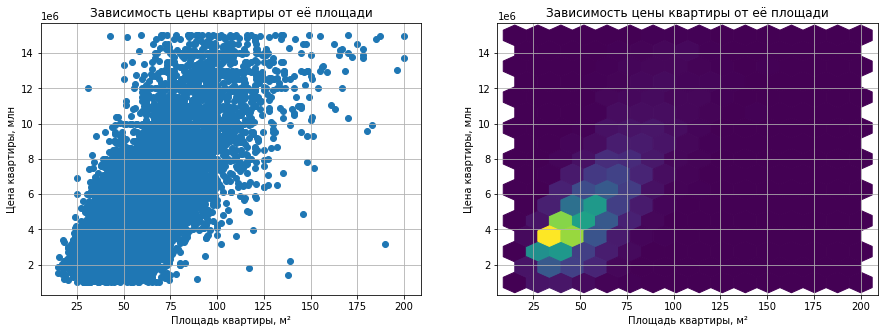

In [63]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(x=good_data['total_area'], y=good_data['last_price'])
plt.title('Зависимость цены квартиры от её площади')
plt.xlabel('Площадь квартиры, м²')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid()

plt.subplot(1, 2, 2)
plt.hexbin(x=good_data['total_area'], y=good_data['last_price'], gridsize=15)
plt.title('Зависимость цены квартиры от её площади')
plt.xlabel('Площадь квартиры, м²')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid()

plt.show()

In [64]:
good_data['last_price'].corr(good_data['total_area']).round(2)

0.75

### Изучим зависимость цены квартиры от числа комнат.

In [65]:
def add_value_labels(ax, spacing=1):
    '''
    Добавляет метки над каждым столбцом столбчатой диаграммы.
    
    Аргументы:
        ax (matplotlib.axes.Axes): объект matplotlib, содержащий оси 
        графика для аннотации.
        
        spacing (int): расстояние между метками и столбцами.
    '''
    
    # Для каждого столбца: разместить метку
    for rect in ax.patches:
        # Получить X и Y координаты метки из прямоугольника
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Количество точек между столбцом и меткой
        space = spacing
        # Вертикальное выравнивание для положительных значений
        va = 'bottom'

        # Если значение столбца отрицательное: разместить метку под столбцом
        if y_value < 0:
            # Инвертирование space, чтобы разместить метку под
            space *= -1
            # Вертикальное выравнивание
            va = 'top'

        # Использование как метки значения Y, делённого на миллион, 
        # в формате числа с одним десятичным знаком
        label = '{:.1f}'.format(y_value / 1e+06)

        # Создание аннотации
        ax.annotate(
            label,                          # используем label как метку
            (x_value, y_value),             # помещаем метку на конец столбца
            xytext=(0, space),              # сдвигаем метку по вертикали на space
            textcoords='offset points',     # интерпретируем xytext как смещение в точках
            ha='center',                    # центрируем метку горизотально
            va=va)                          # устанавливаем вертикальное выравнивание
                                            # в зависимости от знака y_value

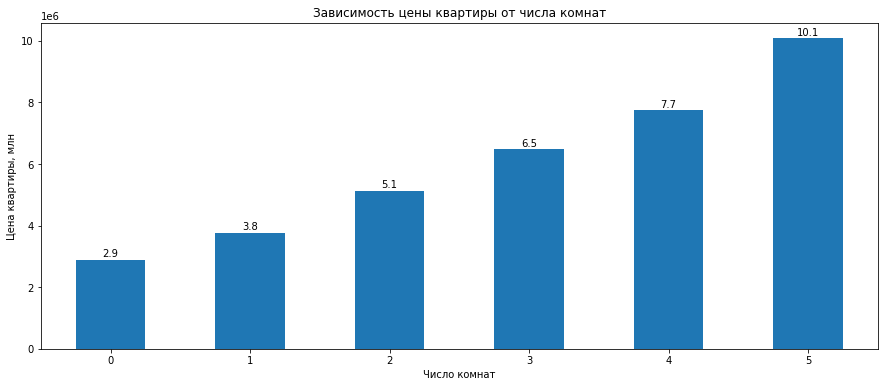

In [66]:
ax = good_data.pivot_table(index='rooms', values='last_price', aggfunc='mean')\
.plot(figsize=(15, 6), kind='bar', legend=False)
add_value_labels(ax)
plt.title('Зависимость цены квартиры от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.xticks(rotation=0)
plt.show()

In [67]:
good_data['last_price'].corr(good_data['rooms']).round(2)

0.49

### Изучим зависимость цены квартиры от удалённости от центра.

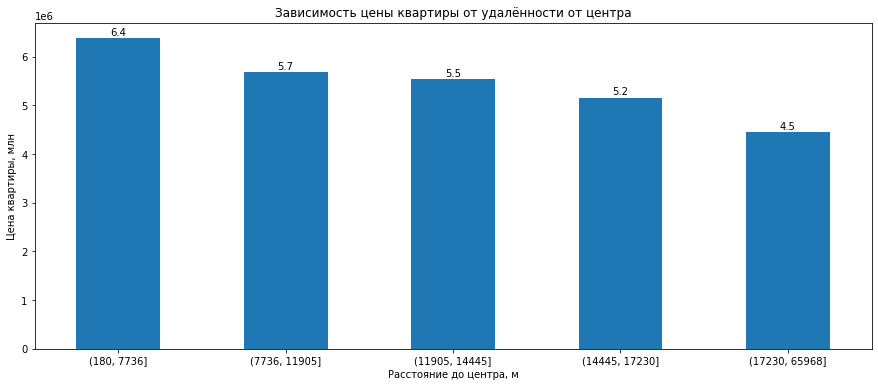

In [68]:
ax = good_data.pivot_table(index='cityCenters_quintiles', values='last_price', aggfunc='mean')\
.plot(figsize=(15, 6), kind='bar', legend=False)
add_value_labels(ax)
plt.title('Зависимость цены квартиры от удалённости от центра')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.xticks(rotation=0)
plt.show()

In [69]:
good_data['last_price'].corr(good_data['cityCenters_nearest'].astype('float')).round(2)

-0.35

### Вывод

Между ценой и площадью квартиры наблюдается немалая прямо пропорциональная зависимость. Это логично, ведь большие квартиры должны стоить дороже.

Зависимость между ценой и числом комнат не очень сильная. Возможно, квартиры в отдалении от центра с большим числом комнат соизмеримы квартирам в центре с меньшим числом комнат. Также большее число комнат не всегда говорит о большей площади квартиры. Но в среднем, конечно, квартиры дорожают с увеличением числа комнат.

Аналогичная ситуация с зависимостью между ценой и расстоянием до центра. Наблюдается совсем небольшая обратно пропорциональная зависимость. Однако квартиры на расстоянии до 8 км от центра в среднем стоят значительно дороже.

### <a id='price_corr_floor'>Изучим зависимость цены квартиры от категории этажа.</a>

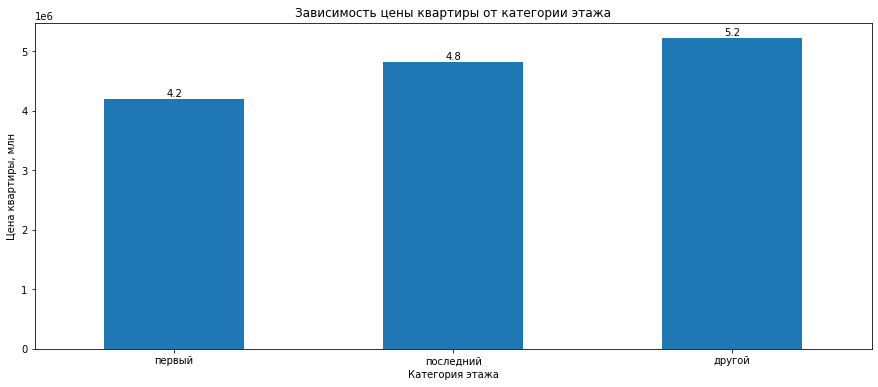

In [70]:
ax = good_data.pivot_table(index='first_last_floor', values='last_price', aggfunc='mean')\
.sort_values(by='last_price').plot(figsize=(15, 6), kind='bar', legend=False)
add_value_labels(ax)
plt.title('Зависимость цены квартиры от категории этажа')
plt.xlabel('Категория этажа')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.xticks(rotation=0)
plt.show()

### Вывод

Люди предпочитают не жить на первом этаже. В среднем такие квартиры оцениваются ниже. Ниже оцениваются и квартиры на последнем этаже, но не так значительно. Всё это вполне логично: за избежание дворового шума и протекающей крыши нужно платить.

### <a id='price_corr_first_exposition'>Изучим зависимость цены квартиры от дня недели размещения объявления.</a>

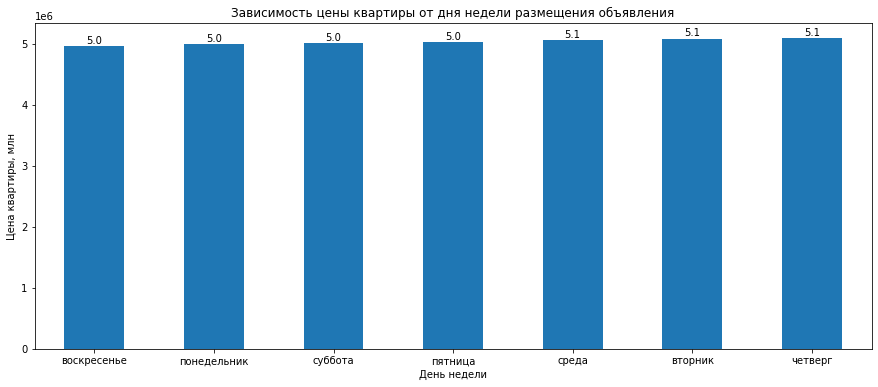

In [71]:
ax = good_data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean')\
.sort_values(by='last_price').plot(figsize=(15, 6), kind='bar', legend=False)
add_value_labels(ax)
plt.title('Зависимость цены квартиры от дня недели размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.xticks(rotation=0)
plt.show()

### Изучим зависимость цены квартиры от месяца размещения объявления.

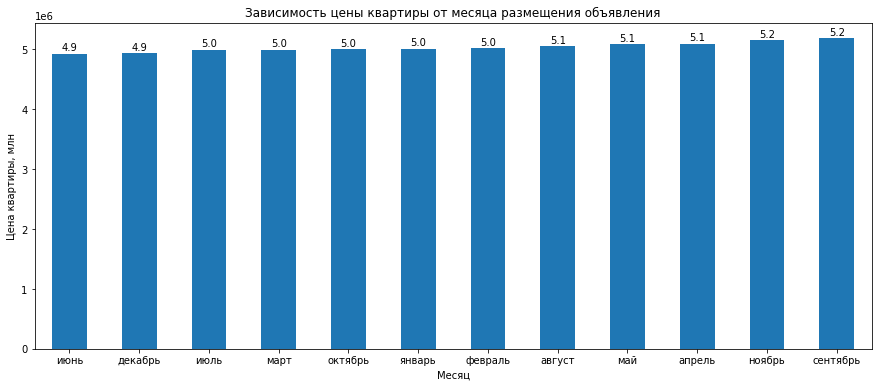

In [72]:
ax = good_data.pivot_table(index='month_exposition', values='last_price', aggfunc='mean')\
.sort_values(by='last_price').plot(figsize=(15, 6), kind='bar', legend=False)
add_value_labels(ax)
plt.title('Зависимость цены квартиры от месяца размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.xticks(rotation=0)
plt.show()

### Изучим зависимость цены квартиры от года размещения объявления.

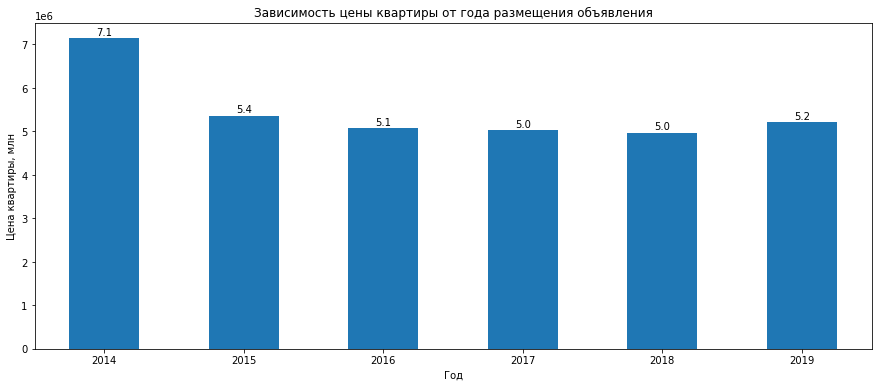

In [73]:
ax = good_data.pivot_table(index='year_exposition', values='last_price', aggfunc='mean')\
.plot(figsize=(15, 6), kind='bar', legend=False)
add_value_labels(ax)
plt.title('Зависимость цены квартиры от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.xticks(rotation=0)
plt.show()

Оказалось, что квартиры в 2014 году стоили на порядок дороже. С объявлениями о продаже этих квартир явно что-то не так.

#### Найдём долю объявлений, датированных 2014 годом.

In [74]:
round(len(good_data.query('year_exposition == 2014')) / len(good_data), 3)

0.002

К счастью, таких объявлений оказалось совсем мало. Смело избавимся от них.

In [75]:
good_data = good_data.query('year_exposition != 2014')

### Вывод

Зависимости цены квартиры от дня и месяца публикации объявления о её продаже нет. Зато оказалось, что квартиры в 2014 году стоили на порядок дороже, чем квартиры, выставленные на продажу в последующие 5 лет. Обратное ещё могло выглядеть логично, но с такой аномалией мириться не стоит. Ввиду того, что такие данные составляют лишь десятую часть процента, продолжим исследование уже без них.

#### Выберем 10 населённых пунктов с наибольшим числом объявлений.

In [76]:
top10_localities = good_data['locality_name'].value_counts()[:10].index.to_list()

#### Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [77]:
(good_data
 .query('locality_name.isin(@top10_localities)')
 .pivot_table(index='locality_name', values='sqm_price', aggfunc='mean')
 .sort_values(by='sqm_price', ascending=False).round().astype('int')
)

,sqm_price
locality_name,
Парголово,200124
Санкт-Петербург,197581
Кудрово,193207
Пушкин,185514
Мурино,177785
Шушары,156013
Колпино,130586
Всеволожск,129578
Гатчина,120368


### Вывод

Из 10 населённых пунктов с наибольшим числом объявлений самыми дорогими в плане жилья оказались посёлок Парголово и, собственно говоря, сам Санкт-Петербург — около 200 тысяч за квадратный метр. В Выборге жильё дешевле более чем вчетверо — квадратный метр здесь стоит около 96-97 тысяч.

### <a id='spb_research'>Сравнительный анализ квартир в центре Санкт-Петербурга и в городе в целом</a>

#### Выделим объявления о продаже квартир в Санкт-Петербурге и сохраним их в переменной *spb*.

In [78]:
spb = good_data.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)

#### Добавим столбец *cityCenters_nearest_km* с расстоянием до центра в километрах.

In [79]:
spb['cityCenters_nearest_km'] = (spb['cityCenters_nearest'] / 1000).round().astype('Int64')

#### Построем график, показывающий, как цена зависит от удалённости от центра.

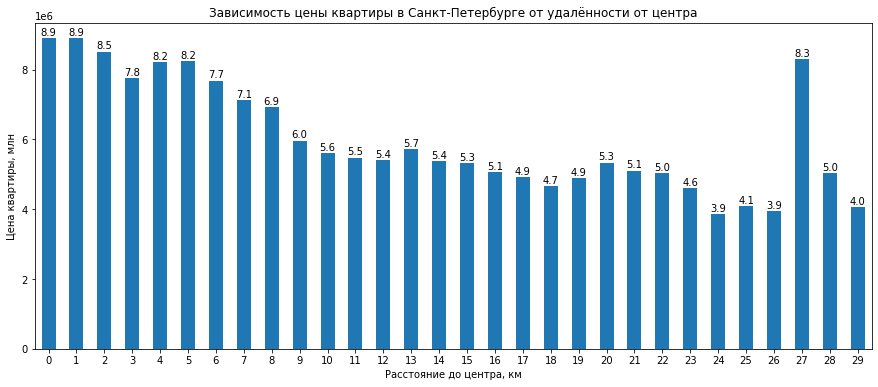

In [80]:
ax = spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')\
.plot(figsize=(15, 6), kind='bar', legend=False)
add_value_labels(ax)
plt.title('Зависимость цены квартиры в Санкт-Петербурге от удалённости от центра')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.xticks(rotation=0)
plt.show()

### Вывод

График зависимости цены от удалённости от центра сильно падает на отметке в 8 км. Это уже было замечено в общем исследовании. Будем считать окрестность от 0 до 8 км центральной зоной. Наблюдается выбивающихся пик на 27-ом километре, где средняя стоимость квартиры достигает 8 млн.

In [81]:
spb.query('cityCenters_nearest_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday_exposition,month_exposition,year_exposition,first_last_floor,living_area_ratio,kitchen_area_ratio,cityCenters_quintiles,cityCenters_nearest_km
332,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,False,False,25.0,0,Санкт-Петербург,23888,27313,1,1496,0,NaN,128,478333,вторник,ноябрь,2017,другой,0.405405,0.337838,"(17230, 65968]",27
2981,6,2250000,32.0,2018-02-27,1,2.65,2,16.5,2,False,False,False,7.0,0,Санкт-Петербург,24006,27431,0,NaN,0,NaN,178,136364,вторник,февраль,2018,последний,0.515625,0.218750,"(17230, 65968]",27


Квартир в 27 километрах от центра оказалось всего лишь две, и одна из них действительно довольно дорогая. Отсюда и аномальный пик.

In [82]:
spb_center = spb.query('cityCenters_nearest_km < 9')

In [83]:
def describe_pair(column):
    return pd.DataFrame(spb_center[column].describe().round(2))\
.join(pd.DataFrame(spb[column].describe().round(2)), lsuffix='_center', rsuffix='_spb')

#### Сравним гистограммы площади квартир в центральной зоне и во всём городе.

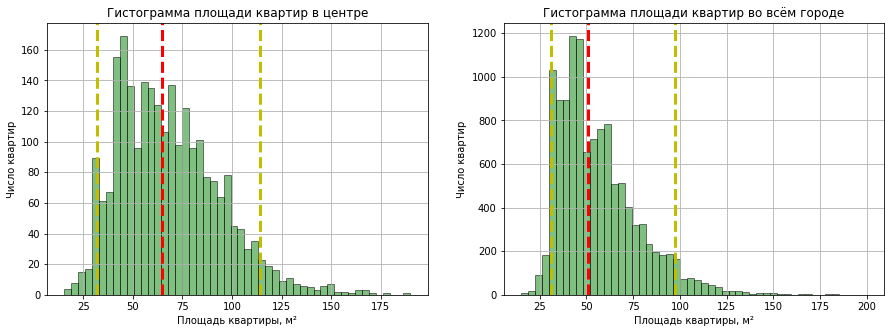

,total_area_center,total_area_spb
count,2447.00,11893.00
mean,68.06,55.85
std,25.71,21.51
min,15.50,15.00
25%,47.20,40.00
50%,64.70,50.70
75%,84.20,67.00
max,190.00,200.00


In [84]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
draw_hist(spb_center, 'total_area', single_figure=False, std_upper_bound=False)
plt.title('Гистограмма площади квартир в центре')
plt.xlabel('Площадь квартиры, м²')
plt.ylabel('Число квартир')

plt.subplot(1, 2, 2)
draw_hist(spb, 'total_area', single_figure=False, std_upper_bound=False)
plt.title('Гистограмма площади квартир во всём городе')
plt.xlabel('Площадь квартиры, м²')
plt.ylabel('Число квартир')

plt.show()

describe_pair('total_area')

#### Сравним гистограммы цены квартир.

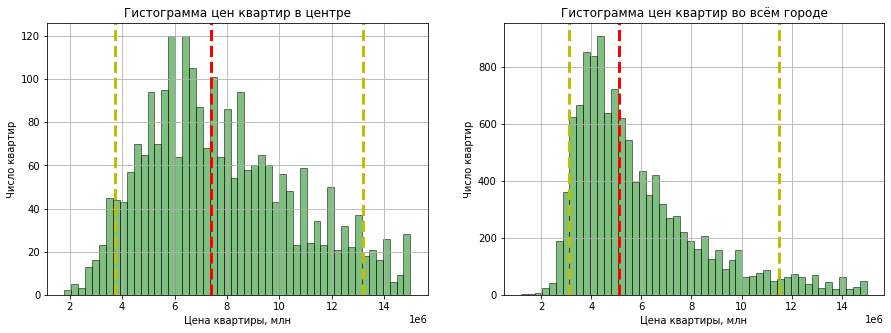

,last_price_center,last_price_spb
count,2447.00,11893.00
mean,7806453.29,5852737.72
std,2851677.36,2547562.70
min,1800000.00,1200000.00
25%,5673525.00,4000000.00
50%,7400000.00,5100000.00
75%,9600000.00,6950000.00
max,15000000.00,15000000.00


In [85]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
draw_hist(spb_center, 'last_price', single_figure=False, std_upper_bound=False)
plt.title('Гистограмма цен квартир в центре')
plt.xlabel('Цена квартиры, млн')
plt.ylabel('Число квартир')

plt.subplot(1, 2, 2)
draw_hist(spb, 'last_price', single_figure=False, std_upper_bound=False)
plt.title('Гистограмма цен квартир во всём городе')
plt.xlabel('Цена квартиры, млн')
plt.ylabel('Число квартир')

plt.show()

describe_pair('last_price')

#### Сравним гистограммы числа комнат в квартире.

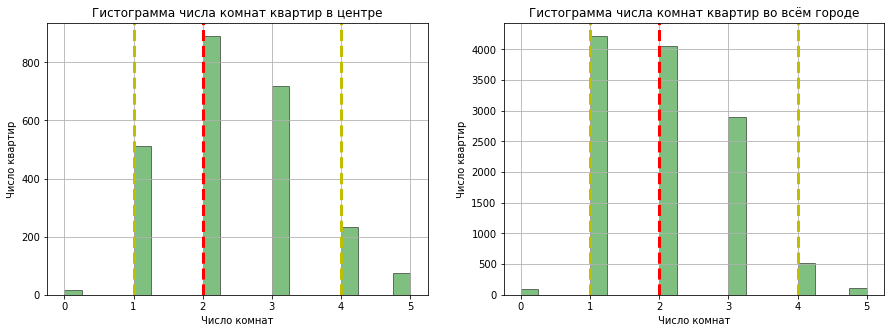

,rooms_center,rooms_spb
count,2447.00,11893.00
mean,2.35,1.99
std,1.03,0.94
min,0.00,0.00
25%,2.00,1.00
50%,2.00,2.00
75%,3.00,3.00
max,5.00,5.00


In [86]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
draw_hist(spb_center, 'rooms', single_figure=False, std_upper_bound=False)
plt.title('Гистограмма числа комнат квартир в центре')
plt.xlabel('Число комнат')
plt.ylabel('Число квартир')

plt.subplot(1, 2, 2)
draw_hist(spb, 'rooms', single_figure=False, std_upper_bound=False)
plt.title('Гистограмма числа комнат квартир во всём городе')
plt.xlabel('Число комнат')
plt.ylabel('Число квартир')

plt.show()

describe_pair('rooms')

#### Сравним гистограммы высоты потолков квартир.

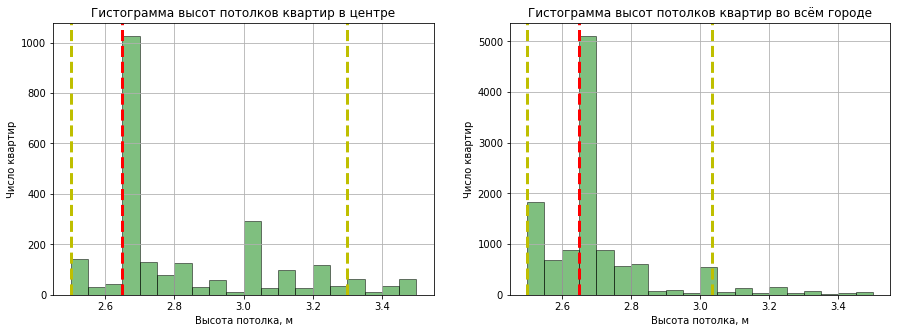

,ceiling_height_center,ceiling_height_spb
count,2447.00,11893.00
mean,2.82,2.68
std,0.25,0.17
min,2.50,2.50
25%,2.65,2.60
50%,2.65,2.65
75%,3.00,2.70
max,3.50,3.50


In [87]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
draw_hist(spb_center, 'ceiling_height', single_figure=False, std_upper_bound=False)
plt.title('Гистограмма высот потолков квартир в центре')
plt.xlabel('Высота потолка, м')
plt.ylabel('Число квартир')

plt.subplot(1, 2, 2)
draw_hist(spb, 'ceiling_height', single_figure=False, std_upper_bound=False)
plt.title('Гистограмма высот потолков квартир во всём городе')
plt.xlabel('Высота потолка, м')
plt.ylabel('Число квартир')

plt.show()

describe_pair('ceiling_height')

### Вывод

В среднем площадь квартир в центральной зоне больше на 10-15 м², чем по городу в целом. Однако в центре достаточно разных квартир: гистограмма напоминает нормальное распределение с выбивающимся пиком в районе 40-50 м². По городу в целом квартиры в основном и имеют такую площадь.

Цены на квартиры в центре также разнообразны и в среднем дороже на пару миллионов, чем по городу в целом. Пики на целых значениях говорят о том, что объявления чаще выставляют, округляя цену.

Медианное значение числа комнат — 2 как в центре, так и по городу в целом. Однако в центре двух- и трёхкомнатных квартир больше, чем однокомнатных, тогда как во всём городе однушки превалируют над всеми остальными.

Высота потолков стремится к стандартному значению в 2.6-2.8 м.

#### Сравним зависимости цены квартиры от её площади в центре Петербурга и во всём городе.

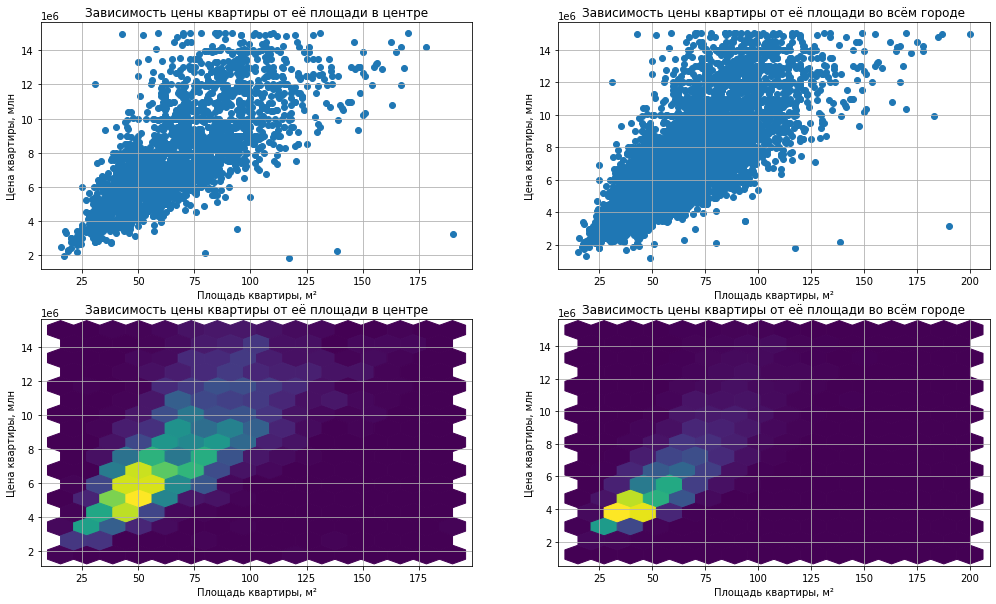

In [88]:
plt.figure(figsize=(17, 10))

plt.subplot(2, 2, 1)
plt.scatter(x=spb_center['total_area'], y=spb_center['last_price'])
plt.title('Зависимость цены квартиры от её площади в центре')
plt.xlabel('Площадь квартиры, м²')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid()

plt.subplot(2, 2, 2)
plt.scatter(x=spb['total_area'], y=spb['last_price'])
plt.title('Зависимость цены квартиры от её площади во всём городе')
plt.xlabel('Площадь квартиры, м²')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid()

plt.subplot(2, 2, 3)
plt.hexbin(x=spb_center['total_area'], y=spb_center['last_price'], gridsize=15)
plt.title('Зависимость цены квартиры от её площади в центре')
plt.xlabel('Площадь квартиры, м²')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid()

plt.subplot(2, 2, 4)
plt.hexbin(x=spb['total_area'], y=spb['last_price'], gridsize=15)
plt.title('Зависимость цены квартиры от её площади во всём городе')
plt.xlabel('Площадь квартиры, м²')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid()

plt.show()

In [89]:
spb_center['last_price'].corr(spb_center['total_area']).round(2)

0.72

In [90]:
spb['last_price'].corr(spb['total_area']).round(2)

0.82

#### Зависимость цены от числа комнат.

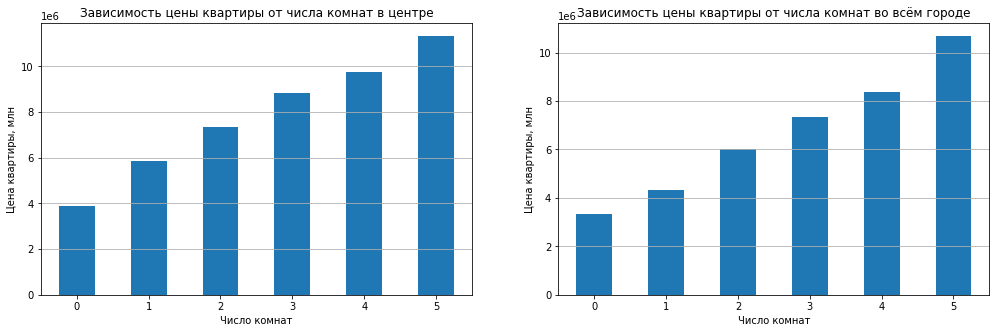

In [91]:
plt.figure(figsize=(17, 5))

plt.subplot(1, 2, 1)
spb_center.groupby('rooms')['last_price'].mean().plot(kind='bar', rot=True)
plt.title('Зависимость цены квартиры от числа комнат в центре')
plt.xlabel('Число комнат')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid(axis='y')

plt.subplot(1, 2, 2)
spb.groupby('rooms')['last_price'].mean().plot(kind='bar', rot=True)
plt.title('Зависимость цены квартиры от числа комнат во всём городе')
plt.xlabel('Число комнат')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid(axis='y')

plt.show()

In [92]:
spb_center['last_price'].corr(spb_center['rooms']).round(2)

0.5

In [93]:
spb['last_price'].corr(spb['rooms']).round(2)

0.54

#### Зависимость цены от удалённости от центра.

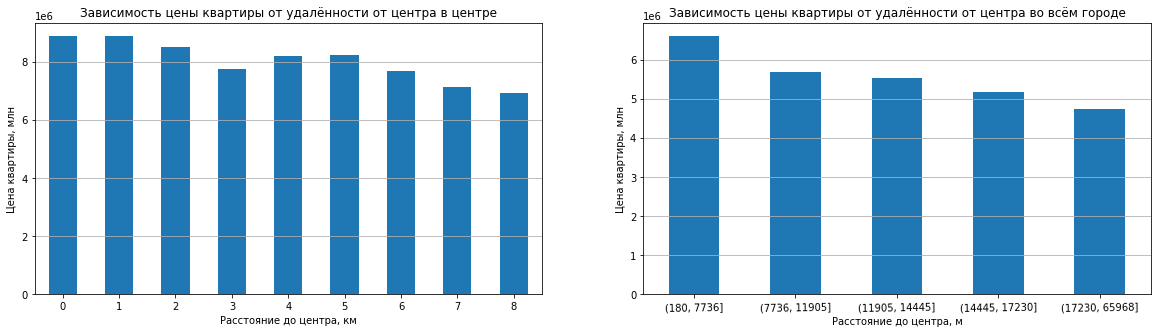

In [94]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
spb_center.groupby('cityCenters_nearest_km')['last_price'].mean().plot(kind='bar', rot=True)
plt.title('Зависимость цены квартиры от удалённости от центра в центре')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid(axis='y')

plt.subplot(1, 2, 2)
spb.groupby('cityCenters_quintiles')['last_price'].mean().plot(kind='bar', rot=True)
plt.title('Зависимость цены квартиры от удалённости от центра во всём городе')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid(axis='y')

plt.show()

In [95]:
spb_center['last_price'].corr(spb_center['cityCenters_nearest_km'].astype(float)).round(2)

-0.18

In [96]:
spb['last_price'].corr(spb['cityCenters_nearest_km'].astype(float)).round(2)

-0.38

### Вывод

Сильная зависимость цены от площади наблюдается в обоих случаях и сильно выделяется по городу в целом.

От числа комнат стоимость квартиры, как и в общем случае, зависит не очень сильно в целом, однако правило "больше комнат — выше цена в среднем" действует в обоих случаях.

Удалённость от центральной точки не сильно беспокоит жителей центральной области Санкт-Петербурга, стремящихся установить цену на квартиру. Оно и понятно, ведь центр и есть центр. В свою очередь, зависимость остаётся относительно слабой даже по городу в целом, за исключением центральной зоны, как было замечено ранее.

#### Зависимость цены квартиры от категории этажа.

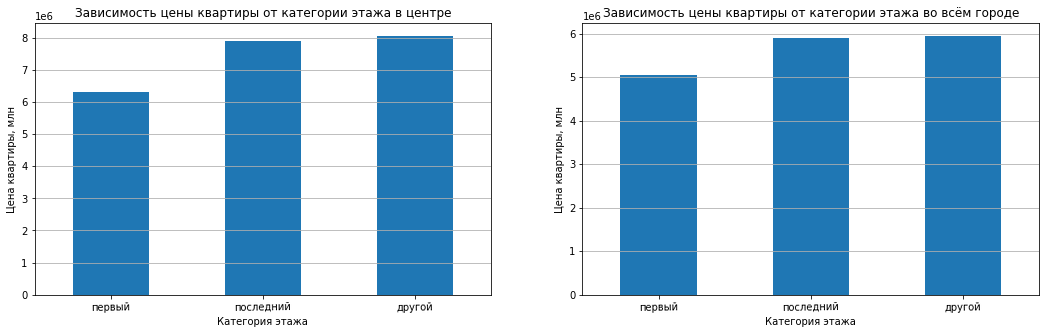

In [97]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
spb_center.groupby('first_last_floor')['last_price'].mean().sort_values().plot(kind='bar', rot=True)
plt.title('Зависимость цены квартиры от категории этажа в центре')
plt.xlabel('Категория этажа')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid(axis='y')

plt.subplot(1, 2, 2)
spb.groupby('first_last_floor')['last_price'].mean().sort_values().plot(kind='bar', rot=True)
plt.title('Зависимость цены квартиры от категории этажа во всём городе')
plt.xlabel('Категория этажа')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid(axis='y')

plt.show()

### Вывод

Петербуржцы также не ценят квартиры на первом этаже. В среднем такие квартиры оцениваются ниже. В целом квартиры в центре стоят значительно дороже и придётся доплатить 1-2 млн, чтобы жить в центральной зоне.

#### Зависимость цены квартиры от дня недели размещения объявления.

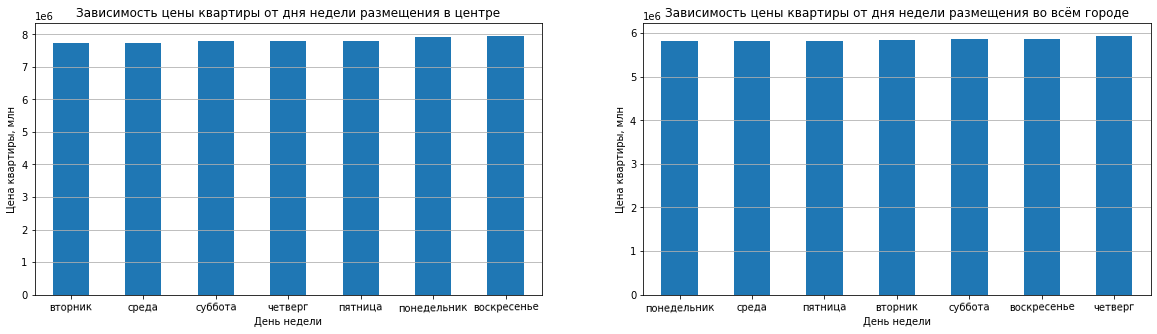

In [98]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
spb_center.groupby('weekday_exposition')['last_price'].mean().sort_values().plot(kind='bar', rot=True)
plt.title('Зависимость цены квартиры от дня недели размещения в центре')
plt.xlabel('День недели')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid(axis='y')

plt.subplot(1, 2, 2)
spb.groupby('weekday_exposition')['last_price'].mean().sort_values().plot(kind='bar', rot=True)
plt.title('Зависимость цены квартиры от дня недели размещения во всём городе')
plt.xlabel('День недели')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid(axis='y')

plt.show()

#### Зависимость цены квартиры от месяца размещения объявления.

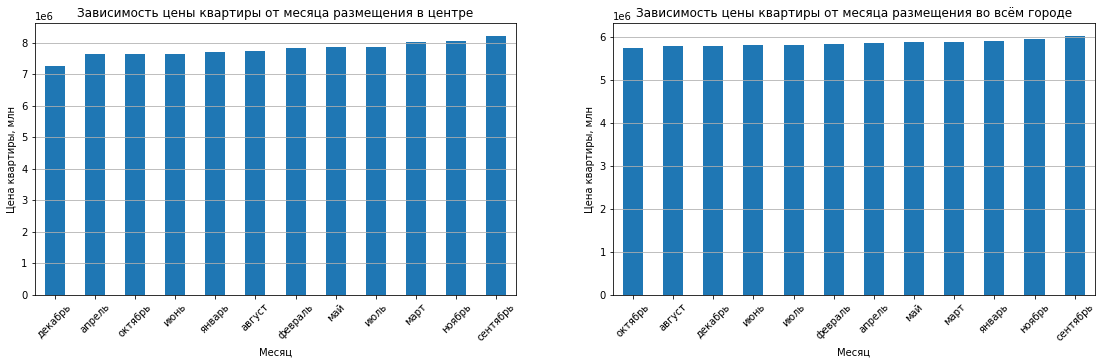

In [99]:
plt.figure(figsize=(19, 5))

plt.subplot(1, 2, 1)
spb_center.groupby('month_exposition')['last_price'].mean().sort_values().plot(kind='bar')
plt.title('Зависимость цены квартиры от месяца размещения в центре')
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
spb.groupby('month_exposition')['last_price'].mean().sort_values().plot(kind='bar')
plt.title('Зависимость цены квартиры от месяца размещения во всём городе')
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

#### Зависимость цены квартиры от года размещения объявления.

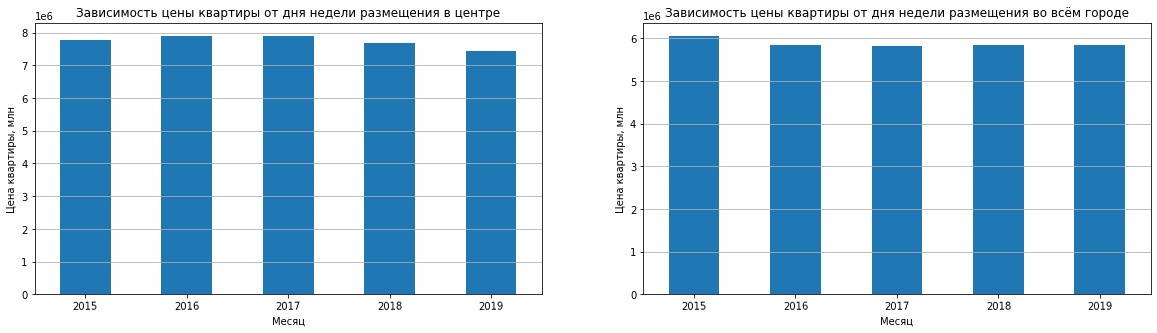

In [100]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
spb_center.groupby('year_exposition')['last_price'].mean().plot(kind='bar', rot=True)
plt.title('Зависимость цены квартиры от дня недели размещения в центре')
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid(axis='y')

plt.subplot(1, 2, 2)
spb.groupby('year_exposition')['last_price'].mean().plot(kind='bar', rot=True)
plt.title('Зависимость цены квартиры от дня недели размещения во всём городе')
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры, млн')
plt.ticklabel_format(axis='y', scilimits=(6, 6))
plt.grid(axis='y')

plt.show()

### Вывод

В центре города цены на квартиры повысились в 2016, держались довольно стабильно в 2017, а затем пошли на спад. По городу в целом, напротив, квартиры подешевели в 2016, после чего цена относительно стабилизировалась.

## <a id='general_conclusion'>Шаг 5. Общий вывод</a>

На вход получен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за 6 лет. Оказалось, что данные находятся в неудобном для анализа состоянии:

1. В данных имеются пропуски.
2. В данных имеется несоответствие типов.
3. Часть данных некорректна: квартиры с потолками от 1 до 100 метров, неправдоподобные площади квартир и расстояния до объектов, а также различное представление эквивалентных данных.

Пропущенная информация в данных о числе парков и водоёмов в радиусе 3 км оказалась взаимосвязанной. Эти пропуски были заменены на 0, так как в них соответствующие данные о расстоянии до ближайшего парка или водоёма оказались больше 3 км. Пропущенные значения в столбцах с индикатором апартаментов и числом балконов были заменены на False и 0 соответственно ввиду логического умозаключения: данные не были введены, так как информации о их наличии нет. Часть пропусков в столбце с названием населённого пункта были заменены Санкт-Петербургом, если расстояние от них до центра оказывалось меньше условного радиуса города. Неуказанная высота потолков была заменена медианным значением. Пропуски в общем количестве этажей в доме, а также оставшиеся пропуски в столбце с названием населённого пункта были удалены, так как таких пропусков было незначительное количество. Информация, полученная автоматически на основе картографических данных, также оказалась неполной. Пропуски в данных о площади квартиры и её отдельных частей, остальных названий населённых пунктов и дней размещения не были обработаны.

Все данные без пропусков, подразумевающие целочисленные элементы, были приведены к соответсвующему типу, а дата публикации объявлений была приведена к формату *datetime*.

Все названия населённых пунктов были сокращены непосредственно до имён собственных. Буквы 'ё' в названиях населённых пунктов были заменены на буквы 'e'. В результате преобразования дубликатов образовано не было.

В таблицу было добавлено 8 новых столбцов с ценой квадратного метра квартиры, днём недели, месяцем и годом публикации объявления, категорией этажа квартиры (первый, последний или другой), а также долями жилой площади и кухни и интервалами в зависимости от расстояния до центра города.

Проведено исследование таких параметров, как площадь квартир, их цена, число комнат и высота потолков. Были получены следующие результаты:
1. Наличие аномально высоких значений у всех параметров.
2. На гистограмме площади квартир наблюдается пик в районе 40-50 м², площадь редко превышает отметку в 150 м² или не достигает 25 м².
3. На гистограмме цен квартир наблюдается пик в районе от 3 до 4.5 млн. Квартиры дороже 15 млн встречаются редко.
4. В основном квартиры имеют 1-2 комнаты, чуть реже — 3. Квартира с более чем 5 комнатами — большая редкость.
5. Высота потолков у большей части квартир варьируется от 2.5 до 3 м.

Исследование времени продажи квартир показало, что в среднем продажа занимает 180 дней, но медианное значение меньше практически в 2 раза — 95 дней, что говорит о наличии выбросов в данных. Продажи продолжительностью свыше двух лет являются аномально долгими. В свою очередь квартиры, проданные быстрее, чем за рабочую неделю, также настораживают. Также на гистограмме наблюдается выбивающиеся пики на 45 и 60 днях. Скорее всего, это связано со стандартными сроками размещения объявлений на платформе.

Выяснилось, что квартир без аномальных параметров — 77%, что достаточно много. Было принято решение исследовать очищенные данные.

Между ценой и площадью квартиры наблюдается немалая прямо пропорциональная зависимость. Это логично, ведь большие квартиры должны стоить дороже.

Зависимость между ценой и числом комнат не очень сильная. Возможно, квартиры в отдалении от центра с большим числом комнат соизмеримы квартирам в центре с меньшим числом комнат. Также большее число комнат не всегда говорит о большей площади квартиры. Но в среднем, конечно, квартиры дорожают с увеличением числа комнат.

Аналогичная ситуация с зависимостью между ценой и расстоянием до центра. Наблюдается совсем небольшая обратно пропорциональная зависимость. Однако квартиры на расстоянии до 8 км от центра в среднем стоят значительно дороже.

Люди предпочитают не жить на первом этаже. В среднем такие квартиры оцениваются ниже. Ниже оцениваются и квартиры на последнем этаже, но не так значительно. Всё это вполне логично: за избежание дворового шума и протекающей крыши нужно платить.

Зависимости цены квартиры от дня и месяца публикации объявления о её продаже нет. Зато оказалось, что квартиры в 2014 году стоили на порядок дороже, чем квартиры, выставленные на продажу в последующие 5 лет. Обратное ещё могло выглядеть логично, но с такой аномалией мириться не стоит. Ввиду того, что такие данные составляют лишь десятую часть процента, исследование было продолжено уже без них.

Отдельно рассматривались 10 населённых пунктов с наибольшим числом объявлений. Самым дорогим в плане жилья оказался посёлок Парголово, а Санкт-Петербург с небольшим отставанием расположился на второй строчке. На 10 месте расположился Выборг, где жильё дешевле более чем вдвое.

График зависимости цены от удалённости от центра сильно падает на отметке в 8 км. Это уже было замечено в общем исследовании. Будем считать окрестность от 0 до 8 км центральной зоной. Наблюдается выбивающихся пик на 27-ом километре, где средняя стоимость квартиры достигает 8 млн. Это произошло из-за того, что в 27 км от центра на продажу выставлено всего две квартиры, одна из которых действительно очень дорогая — она стоит более 14 млн.

Был проведён сравнительный анализ параметров квартир в центре Петербурга и во всём городе в целом.

В среднем площадь квартир в центральной зоне больше на 10-15 м², чем по городу в целом. Однако в центре достаточно разных квартир: гистограмма напоминает нормальное распределение с выбивающимся пиком в районе 40-50 м². По городу в целом квартиры в основном и имеют такую площадь.

Цены на квартиры в центре также разнообразны и в среднем дороже на пару миллионов, чем по городу в целом. Пики на целых значениях говорят о том, что объявления чаще выставляют, округляя цену.

Медианное значение числа комнат — 2 как в центре, так и по городу в целом. Однако в центре двух- и трёхкомнатных квартир больше, чем однокомнатных, тогда как во всём городе однушки превалируют над всеми остальными.

Высота потолков стремится к стандартному значению в 2.6-2.8 м.

Сильная зависимость цены от площади наблюдается в обоих случаях и сильно выделяется по городу в целом.

От числа комнат стоимость квартиры, как и в общем случае, зависит не очень сильно в целом, однако правило "больше комнат — выше цена в среднем" действует в обоих случаях.

Удалённость от центральной точки не сильно беспокоит жителей центральной области Санкт-Петербурга, стремящихся установить цену на квартиру. Оно и понятно, ведь центр и есть центр. В свою очередь, зависимость остаётся относительно слабой даже по городу в целом, за исключением центральной зоны, как было замечено ранее.

Петербуржцы также не ценят квартиры на первом этаже. В среднем такие квартиры оцениваются ниже. В целом квартиры в центре стоят значительно дороже и придётся доплатить 1-2 млн, чтобы жить в центральной зоне.

В центре города цены на квартиры повысились в 2016, держались довольно стабильно в 2017, а затем пошли на спад. По городу в целом, напротив, квартиры подешевели в 2016, после чего цена относительно стабилизировалась.